In [1]:
import tensorflow 
import tensorflow.keras
import numpy as np
import pandas as pd
import time
import string
import re
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,plot_model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report
from keras import metrics
from keras import backend as K
import gensim
from gensim.models import Word2Vec
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from keras.layers import Embedding, Flatten, Conv1D, SpatialDropout1D, MaxPooling1D,AveragePooling1D, merge, concatenate, Input, Dropout

In [2]:
#tensorflow.random.set_seed(2)
from numpy.random import seed
seed(1)

# Load Dataset

In [3]:
#membaca data json
df = pd.read_json('data2knewfix.json')
#mengambil kolom data
dff = df['data'][2]
#merubah list data menjadi dataframe
dt=pd.DataFrame(dff,columns=['id_case','class','sentence1','sentence2'])
pd.set_option('display.max_rows', dt.shape[0]+1)
dt

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,id_case,class,sentence1,sentence2
0,32,5,"Recently, there has been a successful attempt ...","Recently, there has been a successful attempt ..."
1,34,5,The first one is the WS-353 dataset (Finkelste...,The first one is the WS-353 dataset (Finkelste...
2,35,5,Abstract Meaning Representation (AMR) (Banares...,Abstract Meaning Representation (AMR) (Banares...
3,36,5,We perform bootstrap resampling with bounds es...,We perform bootstrap resampling with bounds es...
4,37,5,It is used to support semantic analyses in HPS...,It is used to support semantic analyses in the...
5,1201,4,"We use Stanford parser (de Marneffe et al., 20...",We first use a dependency parser (de Marneffe ...
6,1202,3,Rooth et al. (1999) propose an Expectation-Max...,"Alternatively, Rooth et al. (1999) propose an..."
7,1203,3,"The Levenshtein distance (Levenshtein, 1966) b...",The Levenshtein distance gives an indication o...
8,1204,1,"We use the Moses toolkit (Koehn et al., 2007) ...",We built phrase-based machine translation syst...
9,36,5,We perform bootstrap resampling with bounds es...,We perform bootstrap resampling with bounds es...


# Preprocesing

In [4]:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_tandabaca(words):
    new_words = []
    for word in words:
        new_word = word.translate(str.maketrans("","",string.punctuation))
        new_words.append(new_word)
    return new_words

def remove_space(words):
    new_words = []
    for word in words:
        new_word = word.strip()
        new_words.append(new_word)
    return new_words

def text_cleaning(words):
    words = remove_tandabaca(words)
    words = remove_space(words)
    return words

def preprosessing(words):
    words = to_lowercase(words)
    words = text_cleaning(words)
    return words

In [5]:
#cek jumlah dataset dari setiap kelas
dt['class'].value_counts()

5    822
4    714
3    451
2     32
0      6
1      2
Name: class, dtype: int64

In [6]:
y = dt['class']
y = to_categorical(y)
print(len(y))

2027


In [7]:
#panjang kalimat 
text1 = dt['sentence1'].tolist()
text2 = dt['sentence2'].tolist()
text = [] 
for i in range(0, len(text1)): 
    text.append(text1[i]+text2[i]) 
print(len(text))
print(len(text[1]))
words = preprosessing(text)

2027
314


In [8]:
words

['recently there has been a successful attempt to harmonize the linguistic principles behind the coding systems msd and kr farkas et al 2010 recently there has been a successful attempt to harmonize the coding systems msd and kr farkas et al 2010',
 'the first one is the ws353 dataset finkelstein et al 2001 containing 353 pairs of english words that have been assigned similarity ratings by humansthe first one is the ws353 dataset finkelstein et al 2001  which contains 353 pairs of english words that have been assigned similarity ratings by humans',
 'abstract meaning representation amr banarescu et al 2013 is a semantic formalism where the meaning of a sentence is encoded as a rooted directed graphabstract meaning representation amr banarescu et al 2013 is a semantic formalism encoding the meaning of a sentence as a rooted directed graph',
 'we perform bootstrap resampling with bounds estimation as described in koehn 2004 we perform bootstrap resampling with bounds estimation as descri

In [9]:
myList = [i.split(' ') for i in words]
print(myList)

[['recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'linguistic', 'principles', 'behind', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010', 'recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010'], ['the', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', 'containing', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humansthe', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', '', 'which', 'contains', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humans'], ['abstract', 'meaning', 'representation', 'amr', 'banarescu', 'et', 'al', '2013', 'is', 'a', 'semantic', 'formalism', 'where', 'the', 'meaning', 'of', 'a', 'sentence', '

# Word2Vec

In [10]:
#MEMBUAT MODEL WORD2VEC
word_model = Word2Vec(myList, vector_size=100, min_count=1, window=100, epochs=100, sg=0)
word_model.save("word2vec100size.model")
#word_model.vector_size

In [11]:
#Mengambil bobot word2vec
embedding_matrix = word_model.wv.vectors
embedding_matrix.shape

(3446, 100)

In [12]:
top_words = embedding_matrix.shape[0]

In [13]:
#merubah kata menjadi token
token = Tokenizer(num_words=top_words)
token.fit_on_texts(words)
sequences = token.texts_to_sequences(words)
sequences

[[439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  603,
  2140,
  2141,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117,
  439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117],
 [1,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  890,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1407,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  42,
  240,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1408],
 [892,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  319,
  1,
  157,
  5,
  7,
  136,
  13,
  2142,
  31,
  7,
  1411,
  1412,
  2143,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  2144,
  1,
  157,
  5,
  7,
  136,
  31,
  7,
  1411,
  1412,
  758],
 [6,
  262,
  77,
  80,
  14,
  604,
  411,
  31,
  138,
  8,
  12,
  36,
  6,
  262,
  77,

In [14]:
token.index_word

{1: 'the',
 2: 'et',
 3: 'al',
 4: 'and',
 5: 'of',
 6: 'we',
 7: 'a',
 8: 'in',
 9: 'to',
 10: 'using',
 11: 'for',
 12: 'koehn',
 13: 'is',
 14: 'with',
 15: 'used',
 16: '2007',
 17: 'moses',
 18: 'use',
 19: 'model',
 20: 'toolkit',
 21: 'from',
 22: 'corpus',
 23: 'on',
 24: 'our',
 25: '2011',
 26: 'by',
 27: 'phrasebased',
 28: 'data',
 29: 'system',
 30: 'word',
 31: 'as',
 32: 'are',
 33: 'was',
 34: 'that',
 35: 'translation',
 36: '2004',
 37: '2006',
 38: 'smt',
 39: 'stanford',
 40: '2005',
 41: 'language',
 42: 'which',
 43: '2003',
 44: 'english',
 45: 'ney',
 46: 'training',
 47: 'och',
 48: 'this',
 49: 'systems',
 50: 'trained',
 51: 'all',
 52: 'parser',
 53: '2014',
 54: 'europarl',
 55: 'dependency',
 56: 'machine',
 57: '2009',
 58: 'experiments',
 59: 'giza',
 60: 'standard',
 61: 'based',
 62: 'task',
 63: 'words',
 64: '2012',
 65: 'models',
 66: 'built',
 67: 'were',
 68: 'an',
 69: 'train',
 70: 'statistical',
 71: 'marneffe',
 72: 'similar',
 73: 'alignment'

In [15]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
sequences = np.array(sequences) #dikelompokkan per satu array
sequences

array([list([439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117]),
       list([1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408]),
       list([892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758]),
       ...,
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3444, 231, 1028, 2, 3, 40, 2133, 1, 18, 5, 1027, 93, 26, 10, 600, 378]),
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3445, 1399, 286, 5, 1, 97, 103, 14, 1027, 93, 13, 1400, 602, 34, 5, 

In [16]:
encoded_text = token.texts_to_sequences(words) 
print(encoded_text)

[[439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117], [1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408], [892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758], [6, 262, 77, 80, 14, 604, 411, 31, 138, 8, 12, 36, 6, 262, 77, 80, 14, 604, 411, 31, 138, 26, 12, 36], [98, 13, 15, 9, 158, 130, 320, 8, 264, 44, 251, 146, 380, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 759, 13, 15, 9, 158, 130, 320, 8, 1, 264, 44, 251, 146, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 760], [6, 18, 39, 52, 74, 71, 2, 3, 37, 9, 210, 16

In [17]:
max_kata = 50
X = pad_sequences(encoded_text, maxlen = max_kata, padding='post')
X

array([[ 439,  523,  129, ...,    0,    0,    0],
       [   1,  118,  145, ...,  891,   26, 1408],
       [ 892,  157,  287, ...,    0,    0,    0],
       ...,
       [  48,  384,    5, ...,    0,    0,    0],
       [  48,  384,    5, ...,    0,    0,    0],
       [  91,  379,   13, ...,    0,    0,    0]])

In [18]:
#buat ngebagi data set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state= 40, test_size = 0.2) #X ; kumpulan array, y : kelasnya 

In [19]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
# X_val = np.asarray(X_val)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
# Y_val = np.asarray(Y_val)
X_test

array([[  11,    1,  226, ...,    0,    0,    0],
       [  26,  726,  699, ...,    0,    0,    0],
       [   6,  492,  750, ...,    0,    0,    0],
       ...,
       [1904, 2763,   13, ...,    0,    0,    0],
       [   6,   15,    1, ...,    0,    0,    0],
       [ 118,    6,   15, ...,    0,    0,    0]])

In [25]:
#out_weights = word_model.syn1neg
#print(out_weights)
#word_model.wv.most_similar('scripts')
#kv = word_model.wv
#kv.vectors
#out_weights = word_model.syn1neg
#print(out_weights)
vocab, vectors = word_model.wv.key_to_index, word_model.wv.vectors

# get label and vector index.
label_index = np.array([(voc[0], voc[1]) for voc in vocab.items()])

# init dataframe using embedding vectors and set index as node name
tmp =  pd.DataFrame(vectors[label_index[:,1].astype(int)])
tmp.index = label_index[:, 0]
tmp.to_csv("matrix_with_labels_CNN.csv")

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [22]:
adam = keras.optimizers.Adam(learning_rate=0.001)
adadelta = keras.optimizers.Adadelta(learning_rate=0.001)
sgd = keras.optimizers.SGD(learning_rate=0.001)

In [23]:
def rec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [24]:
def model(optimasi, output_dim=100, max_length=max_kata, y_dim=6, num_filters=64, filter_sizes = [2,3,4], pooling = 'max', pool_padding = 'valid', dropout=0.5):
    
    # Input Layer
    embed_input = Input(shape=(max_length,))
    x = Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],input_length=max_length,weights=[embedding_matrix],trainable=True)(embed_input)
    pooled_outputs = []
    for i in range(len(filter_sizes)):
        conv = Conv1D(num_filters, kernel_size=filter_sizes[i], padding='valid', activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(x)
        if pooling=='max':
            conv = MaxPooling1D(pool_size=max_length-filter_sizes[i]+1, strides=1, padding = pool_padding)(conv)
        else:
            conv = AveragePooling1D(pool_size=max_length-filter_sizes[i]+1, strides=1, padding = pool_padding)(conv)            
        pooled_outputs.append(conv)
    
    merge = concatenate(pooled_outputs)
        
    x = Flatten()(merge)
    dropX = Dropout(0.25)(x)

    predictions = Dense(y_dim, activation = 'softmax')(dropX)
    model = Model(inputs=embed_input,outputs=predictions)
    model.compile(optimizer=optimasi ,loss ='categorical_crossentropy', metrics = ['acc', prec, rec])
    
    print(model.summary())
    
    return model

In [114]:
def plot_history_model(log_data,name, epoh):
    # summarize history for accuracy
    new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
    primes = list(range(1, epoh+1))
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.rcParams.update({'font.size': 19})
    plt.plot(primes,log_data['acc'], label='acc', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_acc'], label='val_acc', color=new_colors[1],linewidth=2)
    plt.title('Model accuracy ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for loss
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['loss'], label='loss', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_loss'], label='val_loss', color=new_colors[1],linewidth=2)
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for precision
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['prec'], label='prec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_prec'], label='val_prec', color=new_colors[1],linewidth=2)
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for Recall
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['rec'], label='rec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_rec'], label='val_rec', color=new_colors[1],linewidth=2)
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [157]:
modeladam = model('adam',output_dim=100, max_length=max_kata,y_dim=6,filter_sizes = [2,3,4], pooling = 'max' )
modeladadelta = model('adadelta',output_dim=100, max_length=max_kata,y_dim=6,filter_sizes = [2,3,4], pooling = 'max' )
modelsgd = model('sgd',output_dim=100, max_length=max_kata,y_dim=6,filter_sizes = [2,3,4], pooling = 'max' )

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, 50, 100)      344600      ['input_13[0][0]']               
                                                                                                  
 conv1d_36 (Conv1D)             (None, 49, 64)       12864       ['embedding_12[0][0]']           
                                                                                                  
 conv1d_37 (Conv1D)             (None, 48, 64)       19264       ['embedding_12[0][0]']           
                                                                                           

In [158]:
epoh = 100
log = CSVLogger('cnnadam.log', separator=',', append=False)
start_time = time.time()
historyadam = modeladam.fit(X_train, Y_train, epochs=epoh, batch_size=16,   validation_split = 0.33, callbacks=[log]) 
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Epoch 1/100
68/68 [==============================] - 11s 19ms/step - loss: 4.3209 - acc: 0.3867 - prec: 0.3853 - rec: 0.3789 - val_loss: 2.1173 - val_acc: 0.5196 - val_prec: 0.5270 - val_rec: 0.5071
Epoch 2/100
68/68 [==============================] - 1s 17ms/step - loss: 2.7191 - acc: 0.5359 - prec: 0.5399 - rec: 0.5316 - val_loss: 1.8827 - val_acc: 0.6093 - val_prec: 0.6341 - val_rec: 0.6079
Epoch 3/100
68/68 [==============================] - 1s 17ms/step - loss: 2.0524 - acc: 0.6188 - prec: 0.6258 - rec: 0.6129 - val_loss: 1.6107 - val_acc: 0.6393 - val_prec: 0.6596 - val_rec: 0.6355
Epoch 4/100
68/68 [==============================] - 1s 16ms/step - loss: 1.6624 - acc: 0.6842 - prec: 0.6894 - rec: 0.6765 - val_loss: 1.5104 - val_acc: 0.6991 - val_prec: 0.7081 - val_rec: 0.6878
Epoch 5/100
68/68 [==============================] - 1s 17ms/step - loss: 1.4217 - acc: 0.7109 - prec: 0.7134 - rec: 0.7058 - val_loss: 1.5801 - val_acc: 0.6972 - val_prec: 0.7106 - val_rec: 0.6828
Epoch 6/1

68/68 [==============================] - 1s 15ms/step - loss: 0.2547 - acc: 0.9696 - prec: 0.9696 - rec: 0.9688 - val_loss: 1.2487 - val_acc: 0.7570 - val_prec: 0.7683 - val_rec: 0.7471
Epoch 84/100
68/68 [==============================] - 1s 17ms/step - loss: 0.2663 - acc: 0.9715 - prec: 0.9715 - rec: 0.9706 - val_loss: 1.2042 - val_acc: 0.7570 - val_prec: 0.7764 - val_rec: 0.7495
Epoch 85/100
68/68 [==============================] - 1s 16ms/step - loss: 0.2645 - acc: 0.9696 - prec: 0.9713 - rec: 0.9678 - val_loss: 1.1188 - val_acc: 0.7701 - val_prec: 0.7819 - val_rec: 0.7660
Epoch 86/100
68/68 [==============================] - 1s 17ms/step - loss: 0.2543 - acc: 0.9586 - prec: 0.9586 - rec: 0.9577 - val_loss: 1.1514 - val_acc: 0.7757 - val_prec: 0.7983 - val_rec: 0.7776
Epoch 87/100
68/68 [==============================] - 1s 14ms/step - loss: 0.2607 - acc: 0.9641 - prec: 0.9640 - rec: 0.9632 - val_loss: 1.1445 - val_acc: 0.7757 - val_prec: 0.7936 - val_rec: 0.7721
Epoch 88/100
68/68

In [159]:
start_time = time.time()
logadadelta = CSVLogger('cnnadadelta.log', separator=',', append=False)
historyadadelta = modeladadelta.fit(X_train, Y_train, epochs=epoh, batch_size=16,  validation_split = 0.33,callbacks=[logadadelta]) 
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Epoch 1/100
68/68 [==============================] - 2s 13ms/step - loss: 11.6587 - acc: 0.0838 - prec: 0.0823 - rec: 0.0813 - val_loss: 10.9687 - val_acc: 0.0150 - val_prec: 0.0147 - val_rec: 0.0147
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 11.6797 - acc: 0.0709 - prec: 0.0713 - rec: 0.0709 - val_loss: 10.6829 - val_acc: 0.0168 - val_prec: 0.0167 - val_rec: 0.0165
Epoch 3/100
68/68 [==============================] - 1s 9ms/step - loss: 11.2848 - acc: 0.0838 - prec: 0.0813 - rec: 0.0800 - val_loss: 10.4125 - val_acc: 0.0224 - val_prec: 0.0221 - val_rec: 0.0221
Epoch 4/100
68/68 [==============================] - 1s 8ms/step - loss: 11.5900 - acc: 0.0829 - prec: 0.0829 - rec: 0.0818 - val_loss: 10.1380 - val_acc: 0.0224 - val_prec: 0.0221 - val_rec: 0.0221
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 11.0112 - acc: 0.0939 - prec: 0.0924 - rec: 0.0909 - val_loss: 9.8715 - val_acc: 0.0262 - val_prec: 0.0257 - val_rec: 0.0257
Epoc

68/68 [==============================] - 2s 24ms/step - loss: 4.3100 - acc: 0.3471 - prec: 0.3523 - rec: 0.3339 - val_loss: 2.1439 - val_acc: 0.4093 - val_prec: 0.4065 - val_rec: 0.3705
Epoch 84/100
68/68 [==============================] - 1s 18ms/step - loss: 4.2678 - acc: 0.3269 - prec: 0.3289 - rec: 0.3174 - val_loss: 2.1393 - val_acc: 0.4037 - val_prec: 0.4062 - val_rec: 0.3724
Epoch 85/100
68/68 [==============================] - 1s 17ms/step - loss: 4.0444 - acc: 0.3527 - prec: 0.3541 - rec: 0.3427 - val_loss: 2.1358 - val_acc: 0.4093 - val_prec: 0.4048 - val_rec: 0.3724
Epoch 86/100
68/68 [==============================] - 1s 21ms/step - loss: 3.9563 - acc: 0.3444 - prec: 0.3503 - rec: 0.3350 - val_loss: 2.1317 - val_acc: 0.4112 - val_prec: 0.4088 - val_rec: 0.3742
Epoch 87/100
68/68 [==============================] - 1s 17ms/step - loss: 4.2219 - acc: 0.3223 - prec: 0.3249 - rec: 0.3076 - val_loss: 2.1278 - val_acc: 0.4131 - val_prec: 0.4079 - val_rec: 0.3724
Epoch 88/100
68/68

In [160]:
start_time = time.time()
logsgd = CSVLogger('cnnsgd.log', separator=',', append=False)
historysgd = modelsgd.fit(X_train, Y_train, epochs=epoh, batch_size=16,  validation_split = 0.33,callbacks=[logsgd]) 
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Epoch 1/100
68/68 [==============================] - 8s 29ms/step - loss: 9.8137 - acc: 0.3600 - prec: 0.3608 - rec: 0.3598 - val_loss: 8.4395 - val_acc: 0.3832 - val_prec: 0.3887 - val_rec: 0.3887
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 6.4357 - acc: 0.4291 - prec: 0.4321 - rec: 0.4277 - val_loss: 2.6965 - val_acc: 0.5215 - val_prec: 0.5190 - val_rec: 0.5158
Epoch 3/100
68/68 [==============================] - 1s 13ms/step - loss: 3.3770 - acc: 0.5396 - prec: 0.5447 - rec: 0.5345 - val_loss: 3.2577 - val_acc: 0.4505 - val_prec: 0.4481 - val_rec: 0.4459
Epoch 4/100
68/68 [==============================] - 1s 12ms/step - loss: 2.9241 - acc: 0.5359 - prec: 0.5373 - rec: 0.5272 - val_loss: 3.9336 - val_acc: 0.4729 - val_prec: 0.4760 - val_rec: 0.4751
Epoch 5/100
68/68 [==============================] - 2s 24ms/step - loss: 2.0716 - acc: 0.6160 - prec: 0.6174 - rec: 0.6113 - val_loss: 1.4521 - val_acc: 0.6523 - val_prec: 0.6610 - val_rec: 0.6358
Epoch 6/10

68/68 [==============================] - 1s 19ms/step - loss: 0.2519 - acc: 0.9770 - prec: 0.9786 - rec: 0.9758 - val_loss: 1.2232 - val_acc: 0.7645 - val_prec: 0.7792 - val_rec: 0.7592
Epoch 84/100
68/68 [==============================] - 1s 16ms/step - loss: 0.2630 - acc: 0.9696 - prec: 0.9706 - rec: 0.9697 - val_loss: 1.2138 - val_acc: 0.7701 - val_prec: 0.7777 - val_rec: 0.7629
Epoch 85/100
68/68 [==============================] - 1s 18ms/step - loss: 0.2638 - acc: 0.9715 - prec: 0.9724 - rec: 0.9715 - val_loss: 1.2179 - val_acc: 0.7645 - val_prec: 0.7751 - val_rec: 0.7665
Epoch 86/100
68/68 [==============================] - 1s 13ms/step - loss: 0.2603 - acc: 0.9751 - prec: 0.9751 - rec: 0.9751 - val_loss: 1.2612 - val_acc: 0.7570 - val_prec: 0.7730 - val_rec: 0.7555
Epoch 87/100
68/68 [==============================] - 1s 14ms/step - loss: 0.2584 - acc: 0.9751 - prec: 0.9751 - rec: 0.9743 - val_loss: 1.2326 - val_acc: 0.7682 - val_prec: 0.7781 - val_rec: 0.7721
Epoch 88/100
68/68

In [161]:
#Tes Data Latih
print("--- Data Train---")
scores = modeladam.evaluate(X_train, Y_train)
print("%s : %.2f%%" % (modeladam.metrics_names[1], scores[1]*100))
scores = modeladam.evaluate(X_train, Y_train)
print("%s : %.2f" % (modeladam.metrics_names[0], scores[0]))

print("\n\n")
print("--- Data Test---")
scores = modeladam.evaluate(X_test, Y_test)
print("%s : %.2f%%" % (modeladam.metrics_names[1], scores[1]*100))
scores = modeladam.evaluate(X_test, Y_test)
print("%s : %.2f" % (modeladam.metrics_names[0], scores[0]))

--- Data Train---
51/51 [==============================] - 0s 5ms/step - loss: 0.5224 - acc: 0.9105 - prec: 0.9141 - rec: 0.9053
acc : 91.05%
51/51 [==============================] - 0s 4ms/step - loss: 0.5224 - acc: 0.9105 - prec: 0.9141 - rec: 0.9053
loss : 0.52



--- Data Test---
13/13 [==============================] - 0s 4ms/step - loss: 1.3700 - acc: 0.7069 - prec: 0.7131 - rec: 0.6906
acc : 70.69%
13/13 [==============================] - 0s 7ms/step - loss: 1.3700 - acc: 0.7069 - prec: 0.7131 - rec: 0.6906
loss : 1.37


In [162]:
#Tes Data Latih
print("--- Data Train---")
scores = modeladadelta.evaluate(X_train, Y_train)
print("%s : %.2f%%" % (modeladadelta.metrics_names[1], scores[1]*100))
scores = modeladadelta.evaluate(X_train, Y_train)
print("%s : %.2f" % (modeladadelta.metrics_names[0], scores[0]))

print("\n\n")
print("--- Data Test---")
scores = modeladadelta.evaluate(X_test, Y_test)
print("%s : %.2f%%" % (modeladadelta.metrics_names[1], scores[1]*100))
scores = modeladadelta.evaluate(X_test, Y_test)
print("%s : %.2f" % (modeladadelta.metrics_names[0], scores[0]))

--- Data Train---
51/51 [==============================] - 0s 4ms/step - loss: 1.9926 - acc: 0.4312 - prec: 0.4352 - rec: 0.3953
acc : 43.12%
51/51 [==============================] - 0s 5ms/step - loss: 1.9926 - acc: 0.4312 - prec: 0.4352 - rec: 0.3953
loss : 1.99



--- Data Test---
13/13 [==============================] - 0s 5ms/step - loss: 2.3123 - acc: 0.3966 - prec: 0.4001 - rec: 0.3706
acc : 39.66%
13/13 [==============================] - 0s 9ms/step - loss: 2.3123 - acc: 0.3966 - prec: 0.4001 - rec: 0.3706
loss : 2.31


In [163]:
#Tes Data Latih
print("--- Data Train---")
scores = modelsgd.evaluate(X_train, Y_train)
print("%s : %.2f%%" % (modelsgd.metrics_names[1], scores[1]*100))
scores = modelsgd.evaluate(X_train, Y_train)
print("%s : %.2f" % (modelsgd.metrics_names[0], scores[0]))

print("\n\n")
print("--- Data Test---")
scores = modelsgd.evaluate(X_test, Y_test)
print("%s : %.2f%%" % (modelsgd.metrics_names[1], scores[1]*100))
scores = modelsgd.evaluate(X_test, Y_test)
print("%s : %.2f" % (modelsgd.metrics_names[0], scores[0]))

--- Data Train---
51/51 [==============================] - 0s 5ms/step - loss: 0.5353 - acc: 0.9143 - prec: 0.9158 - rec: 0.9139
acc : 91.43%
51/51 [==============================] - 0s 4ms/step - loss: 0.5353 - acc: 0.9143 - prec: 0.9158 - rec: 0.9139
loss : 0.54



--- Data Test---
13/13 [==============================] - 0s 4ms/step - loss: 1.4098 - acc: 0.7167 - prec: 0.7258 - rec: 0.7181
acc : 71.67%
13/13 [==============================] - 0s 4ms/step - loss: 1.4098 - acc: 0.7167 - prec: 0.7258 - rec: 0.7181
loss : 1.41


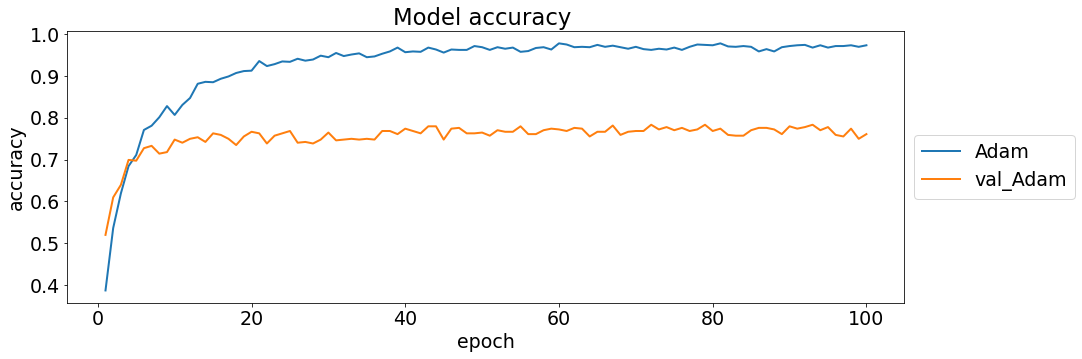

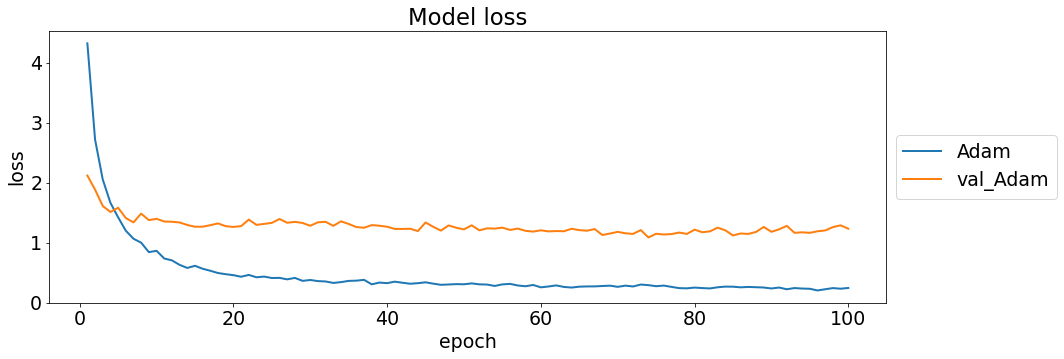

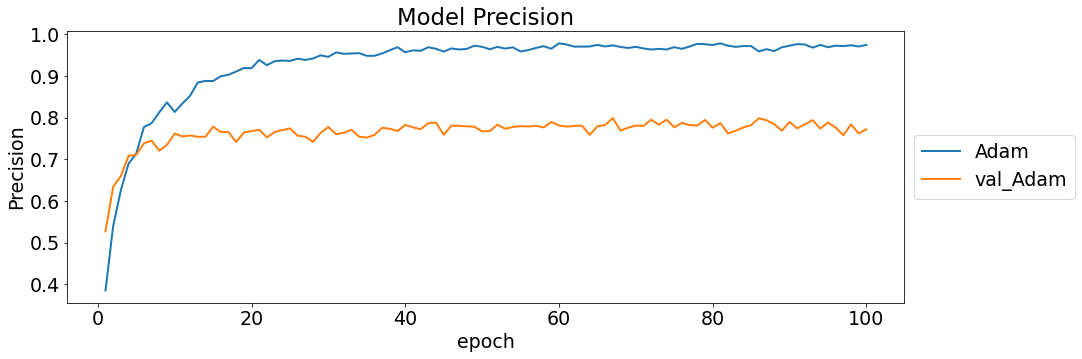

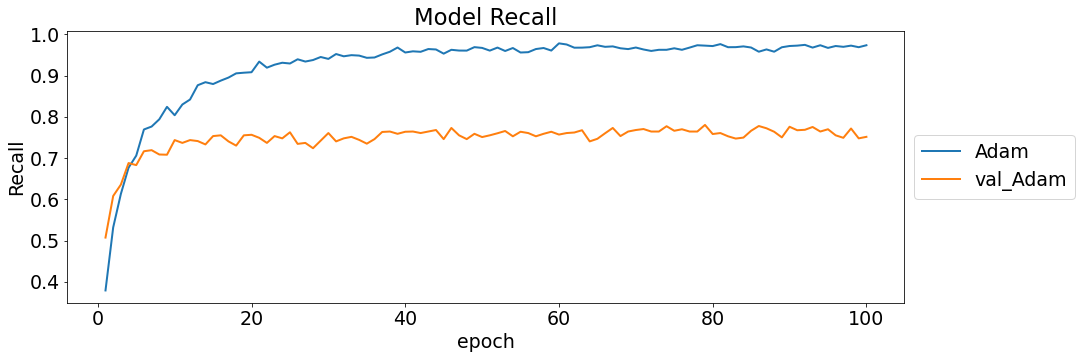

In [164]:
log_data = pd.read_csv('cnnadam.log', sep=',', engine='python') 
plot_history_model(log_data, "Adam", epoh)

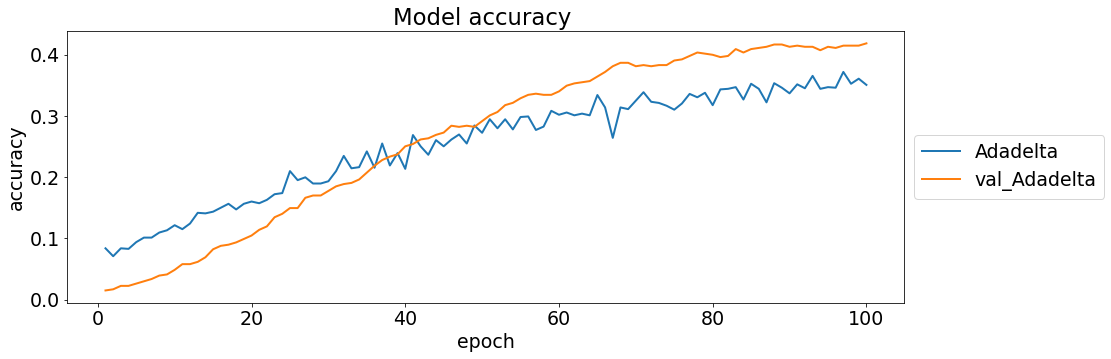

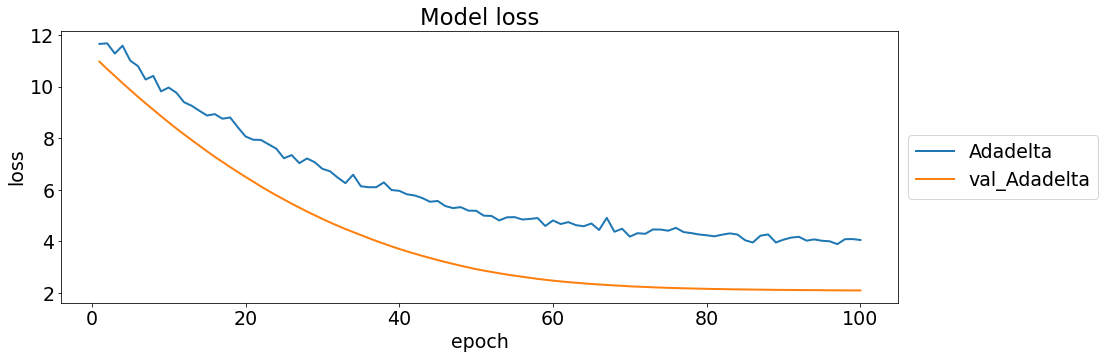

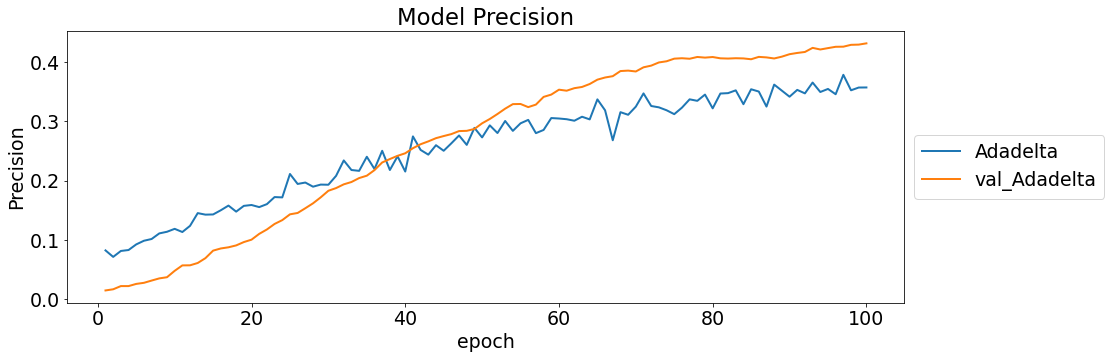

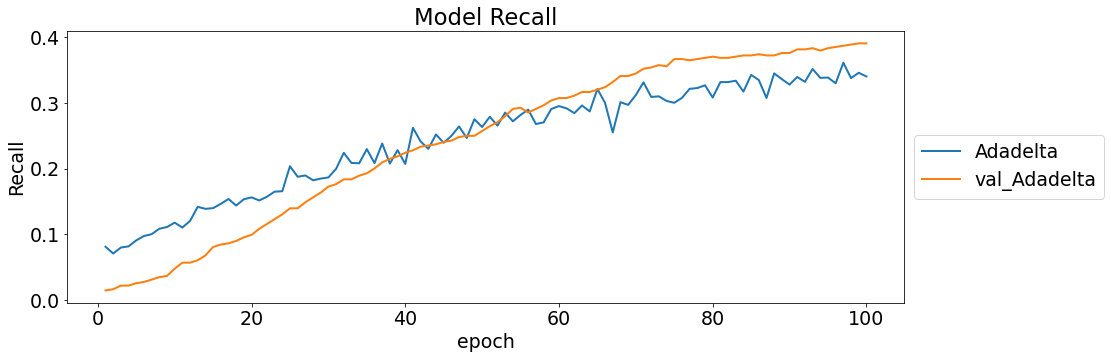

In [165]:
log_data = pd.read_csv('cnnadadelta.log', sep=',', engine='python') 
plot_history_model(log_data, "Adadelta", epoh)

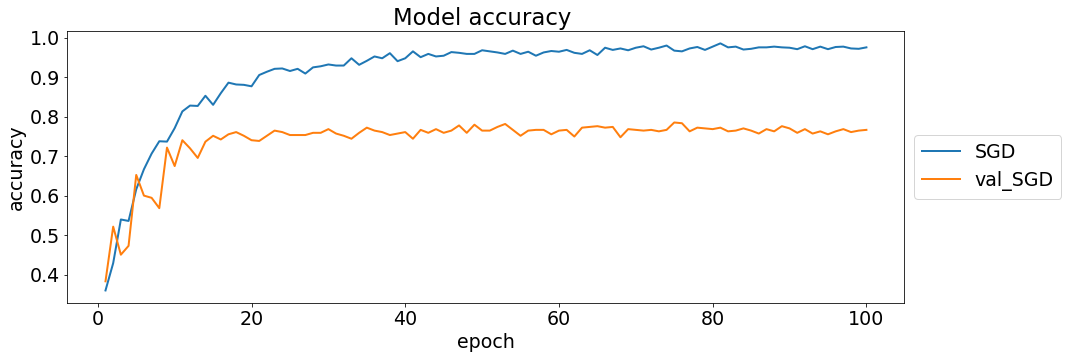

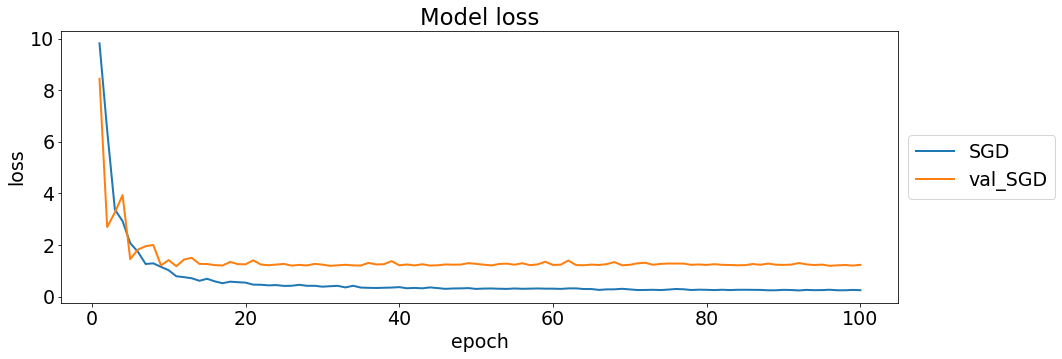

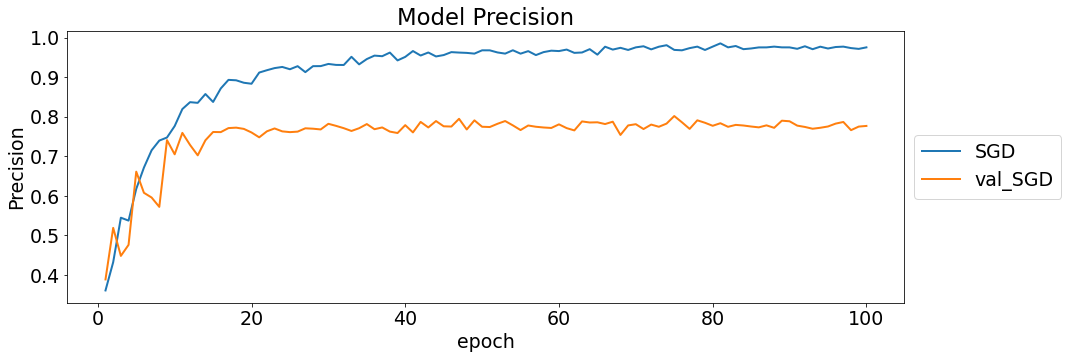

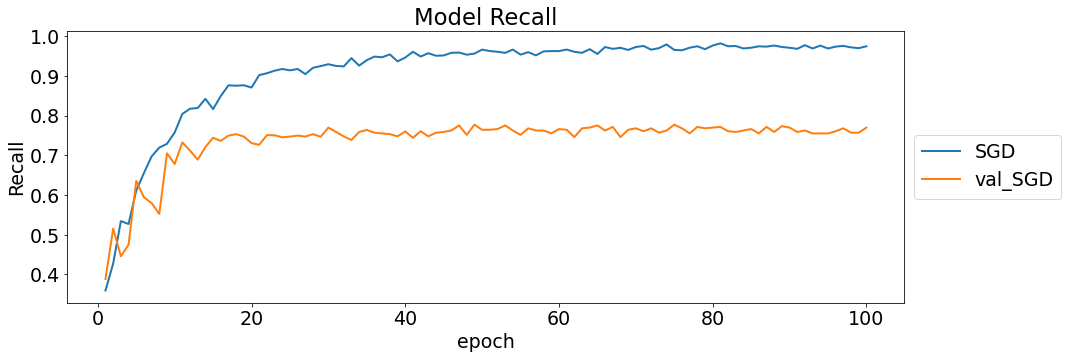

In [166]:
log_data = pd.read_csv('cnnsgd.log', sep=',', engine='python') 
plot_history_model(log_data, "SGD", epoh)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.44      0.62         9
           3       0.68      0.72      0.70        78
           4       0.64      0.71      0.67       140
           5       0.77      0.72      0.74       177

    accuracy                           0.71       406
   macro avg       0.68      0.60      0.62       406
weighted avg       0.71      0.71      0.71       406



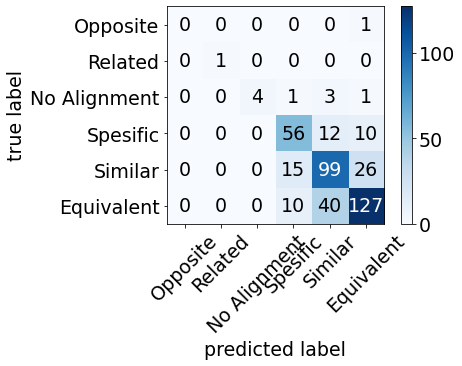

In [167]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = modeladam.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.19      0.13      0.15        78
           4       0.38      0.48      0.42       140
           5       0.47      0.47      0.47       177

    accuracy                           0.40       406
   macro avg       0.17      0.18      0.18       406
weighted avg       0.37      0.40      0.38       406



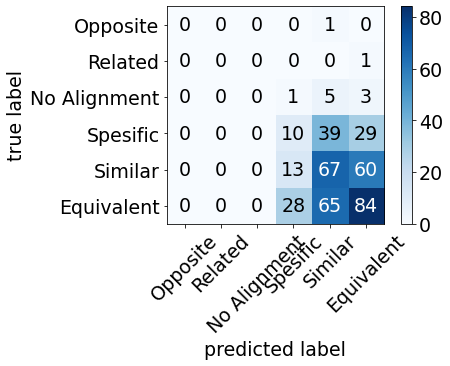

In [168]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = modeladadelta.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.56      0.71         9
           3       0.71      0.71      0.71        78
           4       0.68      0.65      0.67       140
           5       0.73      0.79      0.76       177

    accuracy                           0.72       406
   macro avg       0.69      0.62      0.64       406
weighted avg       0.72      0.72      0.71       406



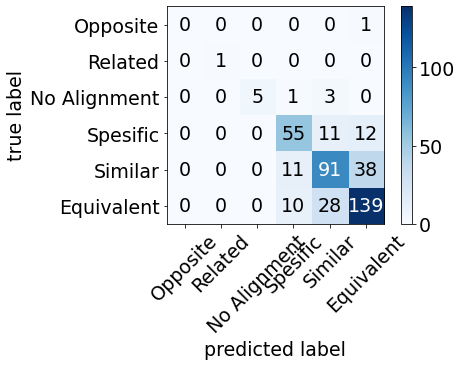

In [169]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = modelsgd.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))

In [170]:
# from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# y_prob = model.predict(X_train) 
# y_pred = y_prob.argmax(axis=-1)
# rounded_labels=np.argmax(Y_train, axis=1)
# mat = confusion_matrix(rounded_labels, y_pred)
# class_names = ['Weak','Comparison', 'Neutral', 'Point']
# plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
# print(classification_report(rounded_labels, y_pred))

In [171]:
# def get_encoded(x):
#     x = token.texts_to_sequences(x)
#     x = pad_sequences(x, maxlen = max_kata, padding='post')
#     return x

In [172]:
# kalimat = []
# kalimat1 = input("Inputkan kalimat : ")
# kalimat.append(kalimat1)
# #kalimat = ['The common phrasebased translation systems, such as ( Och et al., 1999; Koehn, 2004 ), do not use an explicit sentence length model.']
# x = get_encoded(kalimat)
# print(x)

In [173]:
# y_prob = model.predict(x) 
# y_classes = y_prob.argmax(axis=-1)
# y_classes

In [174]:
# result = y_classes
# if (result == 3): 
#     print("PUse")
# elif (result == 2):
#     print("Neut")
# elif (result == 1):
#     print("Coco")
# else:
#     print("Weak")

In [175]:
# my_dict = dict({})
# for idx, key in enumerate(word_model.wv.vocab):
#     my_dict[key] = word_model.wv[key]

In [176]:
# my_dict

In [177]:
# sentences